In [1]:
!pip install tensorflow

In [2]:
!pip install keras numpy matplotlib mnist

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

In [2]:
#Load Dataset
(xtrain,ytrain) , (xtest,ytest) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:

xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

In [5]:
xtrain[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

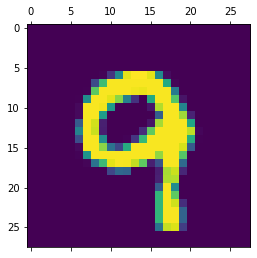

In [8]:
plt.matshow(xtest[99])

In [10]:
#Feature Sclaing
#Normalize 
# dividing the pixels with 255 so max value of pixel becomes 1
xtrain = (xtrain / 255)

In [11]:
xtrain[1]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [13]:
#flatten the images into 28*28 = 784..COnverting 28x28 matrix value to a flat array
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1,784)

In [14]:
xtrain[1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [15]:
# after flattening
xtrain.shape

(60000, 784)

In [17]:
# build a model
# sequential
# 3 layer , first 2 layer 64 neuron and relu function
# output layer 10 layer and softmax function
model = keras.Sequential()
# dense means fuly connected neural network
model.add( Dense(64, activation='relu', input_dim=784)) # input layer
# hidden layer
model.add( Dense(64, activation='relu'))
# output
model.add( Dense(10, activation='softmax'))

In [19]:
# loss is categorical because it has 10 diffirent output
model.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']
)

epoches mean how many iterations will be done 
batch_size is sample size

In [20]:
# train the model
model.fit(xtrain, 
          to_categorical(ytrain),
          epochs=20,
          batch_size=32,
          )

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3959 - accuracy: 0.5543
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4824 - accuracy: 0.8590
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3676 - accuracy: 0.8927
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3224 - accuracy: 0.9053
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2902 - accuracy: 0.9152
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2660 - accuracy: 0.9218
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2444 - accuracy: 0.9277
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2212 - accuracy: 0.9350
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1981 - accuracy: 0.9410
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.185

In [22]:
#Evaluate  the model for accuracy
# evaluating the xtest with corresponding ytest value
model.evaluate(
    xtest,
    to_categorical(ytest)
)

313/313 [==============================] - 0s 1ms/step - loss: 6307.8594 - accuracy: 0.9309


[6307.859375, 0.930899977684021]

In [23]:
pred = model.predict(xtest)

In [24]:
pred

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
np.argmax(pred[99])

9

Text(69.0, 0.5, 'Truth Values')

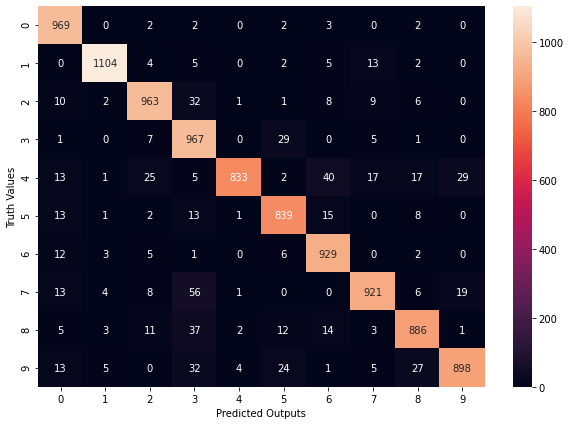

In [27]:

y_pred = model.predict(xtest)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix,annot=True, fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')